# Simple Liner Regression 직접 구현

In [7]:
import tensorflow as tf
import numpy as np

# Hypothesis and Cost
### Hypothesis 
$$ H(x) = Wx + b $$


### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$


In [73]:
#X = [1, 2, 3, 4, 5]
#y = [1, 2, 3, 4, 5]
X = tf.range(10.0)
y = tf.range(10.0)

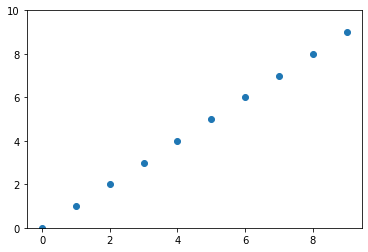

In [74]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
plt.ylim(0, 10)
plt.show()

## Hypothesis

dtype에 유의

A. is not A (float / int)

In [75]:
vector = tf.range(10.0)
tf.reduce_mean(vector)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5>

In [76]:
tf.square(5)

<tf.Tensor: shape=(), dtype=int32, numpy=25>

임의로 hypothesis 하나 생성

In [94]:
W = tf.Variable(1.0)
b = tf.Variable(1.0)


hypothesis = W * X + b

### Hypothesis 

$$ H(x) = 2.0x + 0.5 $$

In [95]:
hypothesis

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [96]:
hypothesis.numpy()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

파란점이 실제 데이터, 빨간선이 H(x)

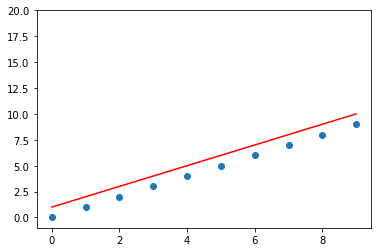

In [97]:
plt.plot(X_test, hypothesis.numpy(), 'r-')
plt.plot(X_test, y_test, 'o')
plt.ylim(-1, 20)
plt.show()

## Cost

In [98]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

## Gradient Descent

$$ Minimize cost(W, b) $$

Cost 

In [99]:
with tf.GradientTape() as tape:
    hypothesis = W * X + b
    cost = tf.reduce_mean(tf.square(hypothesis - y))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(9.0, 2.0)

## 파라미터 업데이트

손실을  w 로 미분했을 때 마이너스면  w 를 증가시키면 된다. 플러스면 감소시킨다. 그러면 얼마나 증가시킬 것인가? 두 가지 요소를 고려한다. 하나는 손실이 많이 줄어드면, 파라미터를 많이 증가시키는 것이다. 즉 미분값에 비례해서 변화시킨다. 또 하나는 학습률이다. 미분값만큼 그대로 변화시키면 파라미터가 한 번에 너무 많이 변하므로 적당한 학습률(보통 0.01~0.001)을 곱해준다.

In [84]:
learning_rate = 0.01

(1.385, 0.4)

이제  w←w−η∂w 의 식으로 파라미터를 수정해준다.  η 는 학습률을 나타낸다. 
경사(미분)을 따라 손실을 줄여나가기 때문에 경사하강법이라고 부른다. 

텐서플로에서 a.assign_sub(b)는 일반적인 파이썬 코드에서 a = a - b와 같다

In [104]:
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(0.91, 0.98)

(-1.0, 20.0)

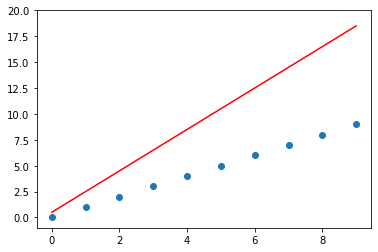

In [87]:
plt.plot(X, hypothesis.numpy(), 'r-')
plt.plot(X, y, 'o')
plt.ylim(-1, 20)

## 여러 번 반복

    0|    1.7720|    0.3190|111.685013
   10|    0.9713|    0.1805|  0.009545
   20|    0.9728|    0.1706|  0.008520
   30|    0.9743|    0.1612|  0.007608
   40|    0.9757|    0.1523|  0.006793
   50|    0.9770|    0.1439|  0.006066
   60|    0.9783|    0.1360|  0.005416
   70|    0.9795|    0.1285|  0.004836
   80|    0.9806|    0.1214|  0.004318
   90|    0.9817|    0.1147|  0.003856


(-1.0, 20.0)

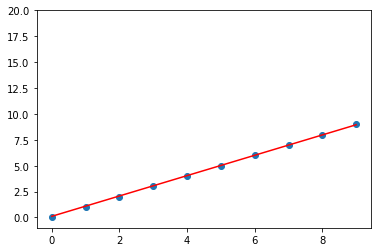

In [88]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * X + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(X, y, 'o')
plt.plot(X, hypothesis.numpy(), 'r-')
plt.ylim(-1, 20)

# predict

In [91]:
def pred_func(x):
    return W * x + b

In [92]:
print(pred_func(5))

tf.Tensor(5.000318, shape=(), dtype=float32)


## 전체 코드

In [90]:
import tensorflow as tf
import numpy as np

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(1000):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059
  100|    1.0048|   -0.0173|  0.000055
  110|    1.0046|   -0.0168|  0.000051
  120|    1.0045|   -0.0162|  0.000048
  130|    1.0043|   -0.0157|  0.000045
  140|    1.0042|   -0.0151|  0.000042
  150|    1.0041|   -0.0146|  0.000039
  160|    1.0039|   -0.0141|  0.000037
  170|    1.0038|   -0.0137|  0.000034
  180|    1.0037|   -0.0132|  0.000032
  190|    1.0035|   -0.0128|  0.000030
  200|    1.0034|   -0.0124|  0.000028
  210|    1.0033|   -0.0119|  0.000026
  220|    1.0032|   -0.0115|  0.000024
  230|    1.0031|   -0.0112|  0.000023
  240|    1.0030|   -0.0108|  0.000021
  250|    1.0029|   -0.01